The adjusted R-squared coefficient is 0.247022


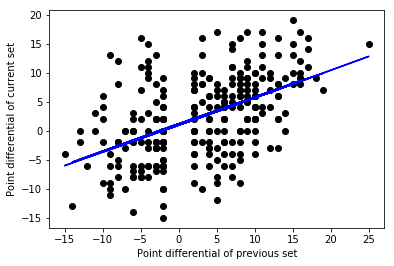

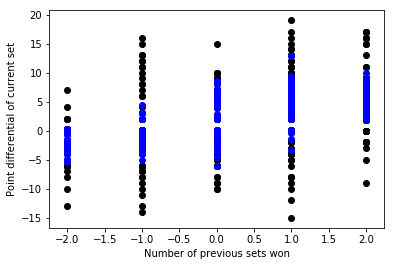

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

scoreboard = np.genfromtxt('scores.csv', delimiter=',')

scoreboard = scoreboard[1:,:]

num_games = scoreboard.shape[0]

X = np.zeros((num_games*4, 2))

y = np.zeros((num_games*4, 1))

record_index = 0

for game_index in range(num_games):
    game = scoreboard[game_index, :] # grab a game
    total_win_loss = 1 if game[2] > 0 else -1
    set_index = 1
    while abs(total_win_loss) < 3 and set_index < 5: # while game did not end
        prev_point_dif = game[(set_index-1)*3+2]
        cur_point_dif = game[set_index*3+2]
        X[record_index] = [prev_point_dif, total_win_loss]
        y[record_index] = [cur_point_dif]
        record_index += 1
        if cur_point_dif > 0:
            total_win_loss += 1
        else:
            total_win_loss -= 1
        set_index += 1

X = X[:record_index, :]
y = y[:record_index, :]

reg = LinearRegression().fit(X, y)
print( "The adjusted R-squared coefficient is %f" % reg.score(X,y) )
y_pred = reg.predict(X)

plt.scatter(X[:,0], y, color='black')
plt.plot(X[:,0], y_pred, color='blue')
plt.xlabel("Point differential of previous set")
plt.ylabel("Point differential of current set")
plt.show()

plt.scatter(X[:,1], y, color='black')
plt.scatter(X[:,1], y_pred, color='blue')
plt.xlabel("Number of previous sets won")
plt.ylabel("Point differential of current set")
plt.show()